In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

Matplotlib is building the font cache; this may take a moment.
2025-03-17 18:59:54.537353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 18:59:54.973281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 18:59:55.241302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742237995.538486     233 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742237995.631682     233 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742237996.323512     233 computation_placer.cc:177] computation p

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q tensorflow-datasets tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow_datasets as tfds

In [7]:
for mnist_example in mnist_train.take(1):
    image, label = mnist_example["image"], mnist_example["label"]

    plot.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

NameError: name 'mnist_train' is not defined

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [9]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

2025-03-17 19:16:52.041389: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Shuffling /home/79f2bb5c-19ff-457f-8419-9f841b988dbb/tensorflow_datasets/mnist/incomplete.WTUC0Y_3.0.1/mnist-t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/79f2bb5c-19ff-457f-8419-9f841b988dbb/tensorflow_datasets/mnist/incomplete.WTUC0Y_3.0.1/mnist-t…

Dataset mnist downloaded and prepared to /home/79f2bb5c-19ff-457f-8419-9f841b988dbb/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


2025-03-17 19:19:56.463755: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-17 19:19:56.471945: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-17 19:19:56.512256: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Label: 4


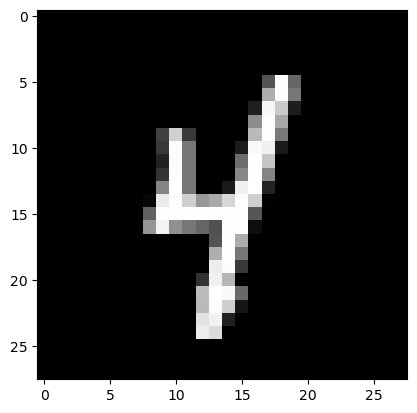

In [11]:
for mnist_example in mnist_train.take(1): 
    image, label = mnist_example["image"], mnist_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

In [12]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [13]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [18]:
info = mnist_builder.info
print(info)



tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/79f2bb5c-19ff-457f-8419-9f841b988dbb/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb

In [19]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/79f2bb5c-19ff-457f-8419-9f841b988dbb/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb

2025-03-17 19:49:48.152015: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-17 19:49:48.161989: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


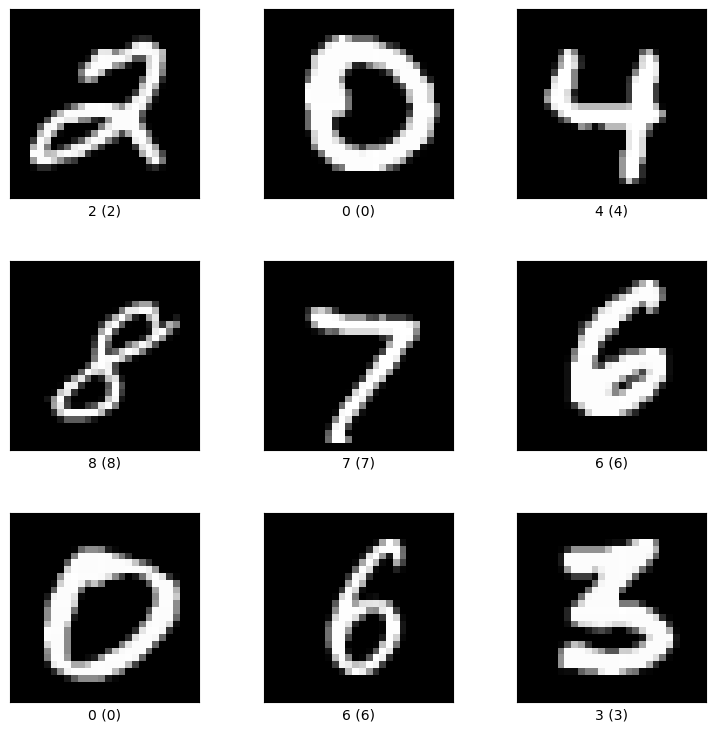

In [27]:
fig = tfds.show_examples(mnist_test, info)

In [29]:
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
num_classes = 10
num_features = 784

In [32]:
learning_rate = 0.001
training_steps = 500
batch_size = 256
display_step = 100

In [33]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), \
x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

2025-03-17 19:54:04.132766: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [35]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

b = tf.Variable(tf.zeros([num_classes]), name="bias")



In [38]:
def logistic_regression(x):

    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):

    y_true = tf.one_hot(y_true, depth=num_classes)

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):

    correct_prediction = tf.equal(tf.argmax(y_pred, 1),
                              tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(
        correct_prediction, tf.float32))

optimizer = tf.optimizers.SGD(learning_rate)

In [39]:
def run_optimization(x, y):

    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [44]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        


2025-03-17 20:05:08.089514: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


step: 100, loss: 124.736969, accuracy: 0.886719
step: 200, loss: 99.649536, accuracy: 0.890625
step: 300, loss: 77.181519, accuracy: 0.902344
step: 400, loss: 97.342270, accuracy: 0.902344
step: 500, loss: 84.746948, accuracy: 0.925781


In [47]:
         pred = logistic_regression(x_test)
         print("Test Accuracy: %f" % accuracy(pred, y_test))


Test Accuracy: 0.910400


In [48]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

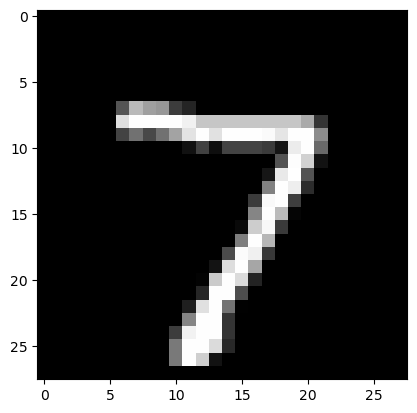

Model prediction: 7


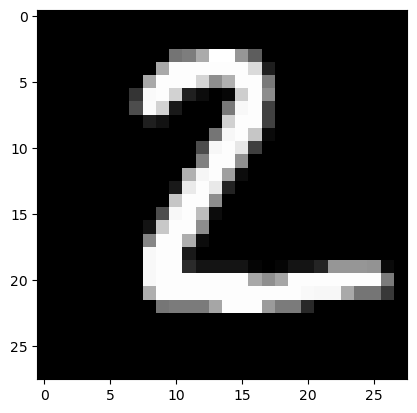

Model prediction: 2


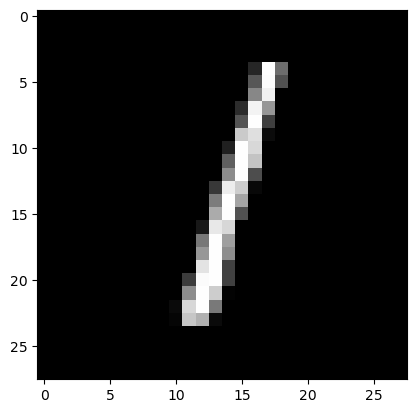

Model prediction: 1


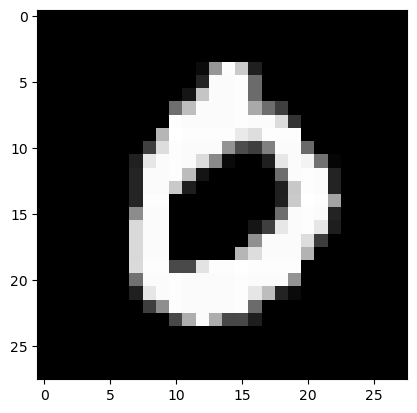

Model prediction: 0


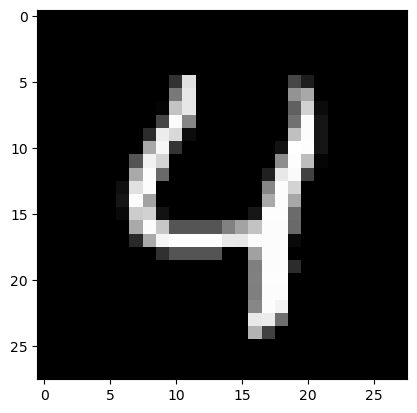

Model prediction: 4


In [52]:
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))